In [49]:
from tensorflow.keras.datasets import mnist
(train_images, train_lables), (test_images, test_lables) = mnist.load_data()
print ('train_images shape = ', train_images.shape)
print ('train_lables ', train_lables)
print ('test_images = ', test_images.shape)
print ('test_lables ', test_lables)

train_images shape =  (60000, 28, 28)
train_lables  [5 0 4 ... 5 6 8]
test_images =  (10000, 28, 28)
test_lables  [7 2 1 ... 4 5 6]


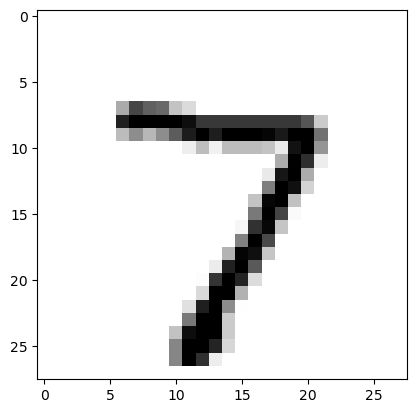

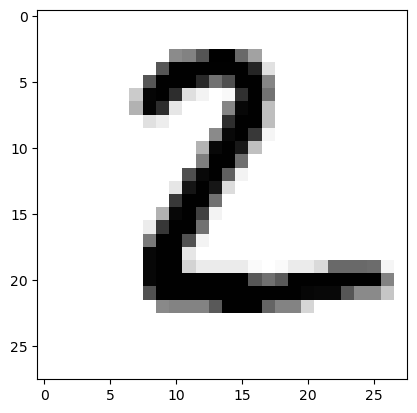

In [52]:
import matplotlib.pyplot as plt
digit = test_images[0]
digit2 = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [28]:
from tensorflow.keras.utils import to_categorical
print('before change', test_lables[0])
train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)
print('after change', test_lables[0])

before change 7
after change [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [29]:
network.fit(train_images, train_lables, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2575 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0368 - accuracy: 0.9889


In [36]:
test_loss, test_acc = network.evaluate(test_images, test_lables, verbose=1)
print(test_loss) 
print('test_acc', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 12.2138 - accuracy: 0.9804
12.213818550109863
test_acc 0.980400025844574


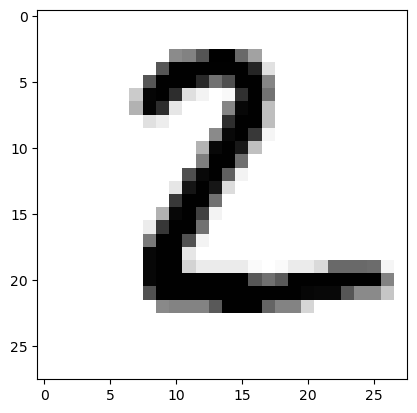

10
the number for the picture is :  2


In [57]:
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()

res = network.predict(test_images)

print(res[1].shape[0])

for i in range(res[1].shape[0]):
    if (res[1][i] == 1):
        print("the number for the picture is : ", i)
        break